### Importing the modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the csv file

In [2]:
df = pd.read_csv('/Users/Shobhit/Downloads/traffic.csv')
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


### Converting date column into datetime datatype

In [3]:
df['date'] = pd.to_datetime(df['date'])

In [4]:
df.dtypes

event              object
date       datetime64[ns]
country            object
city               object
artist             object
album              object
track              object
isrc               object
linkid             object
dtype: object

## 1. How many total pageviews and pageviews per day?

### Total pageviews 

In [5]:
sum(df['event']=='pageview')

142015

### Pageviews for each date

In [6]:
#dates= df['date'].dt.floor('D')
#df1 = df.groupby(dates).size()
df.loc[df['event']=='pageview'].groupby('date').size()

date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
dtype: int64

## 2. Other events 

### What different types of events do we have?

In [7]:
df['event'].unique()

array(['click', 'preview', 'pageview'], dtype=object)

### Total clicks and per day clicks

In [8]:
print(sum(df['event']=='click'))
df.loc[df['event']=='click'].groupby('date').size()

55732


date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
dtype: int64

### Total previews and per day previews 

In [9]:
print(sum(df['event']=='preview'))
df[df['event']=='preview'].groupby('date').size()

28531


date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
dtype: int64

## 3. Which countries the pageviews come from?

In [10]:
pageview_countries = df.loc[df['event']=='preview', 'country'].unique()
print(pageview_countries)

['India' 'Oman' 'Saudi Arabia' 'Qatar' 'Kuwait' 'Austria' 'France' 'Iraq'
 'United Kingdom' 'Pakistan' 'United Arab Emirates' 'Turkey' 'Thailand'
 'Sweden' 'Poland' 'Singapore' 'Ireland' 'St Kitts and Nevis'
 'South Africa' 'Italy' 'Germany' 'United States' 'Belgium' 'Ghana'
 'Rwanda' 'Norway' 'Philippines' 'Nigeria' 'Moldova' 'Netherlands'
 'Maldives' 'Lithuania' 'Australia' 'Egypt' 'Mexico' 'Jordan' 'Angola'
 'Morocco' 'Bolivia' 'Argentina' 'Canada' 'Israel' 'Kenya' 'Finland'
 'Djibouti' 'Guatemala' 'Jamaica' 'Romania' 'Palestine' 'Denmark' 'Peru'
 'Serbia' 'Russia' 'Bangladesh' 'Bosnia and Herzegovina' 'Albania'
 'Somalia' 'Tanzania' 'New Zealand' 'Algeria' 'Hungary' 'Yemen' 'Libya'
 'Czechia' 'Greece' 'Sri Lanka' 'Mayotte' 'Ukraine' 'Switzerland'
 'Bahrain' 'Portugal' 'Nicaragua' 'Gabon' 'Mozambique' 'Ivory Coast'
 'Mauritius' 'Kazakhstan' 'Nepal' 'Indonesia' 'Trinidad and Tobago'
 'Brazil' 'El Salvador' 'Mali' 'Paraguay' 'Syria' 'Sudan' 'Cameroon'
 'Venezuela' 'Dominican Republic'

## 4. Overall click rate

In [11]:
total_clicks = sum(df['event']=='click')
total_pageviews = sum(df['event']=='pageview')
overall_click_rate = total_clicks/total_pageviews
print(overall_click_rate*100, '%')

39.24374185825441 %


## 5. Clickrate distribution 

### How many links are there?

In [12]:
len(df['linkid'].unique())

3839

### Number of clicks per link

In [13]:
clicks_per_link = df[df['event']=='click'].groupby('linkid').size()
clicks_per_link = clicks_per_link.to_frame()
print(clicks_per_link)

                                       0
linkid                                  
00126b32-0c35-507b-981c-02c80d2aa8e7   2
004b9724-abca-5481-b6e9-6148a7ca00a5   1
0063a982-41cd-5629-96d0-e1c4dd72ea11   2
006af6a0-1f0d-4b0c-93bf-756af9071c06   8
00759b81-3f04-4a61-b934-f8fb3185f4a0   3
...                                   ..
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead  29
fff38ca0-8043-50cd-a5f1-f65ebb7105c5   1
fff84c0e-90a1-59d8-9997-adc909d50e16   1
fffc17a7-f935-5d3e-bd3e-d761fd80d479   1
fffd0045-29de-522b-b5d8-35786363bf07   1

[2255 rows x 1 columns]


### Number of pageviews per link

In [14]:
pageviews_per_link = df[df['event']=='pageview'].groupby('linkid').size()
pageviews_per_link = pageviews_per_link.to_frame()
print(pageviews_per_link)

                                      0
linkid                                 
00073307-ae96-5089-a117-4783afb42f8e  2
00126b32-0c35-507b-981c-02c80d2aa8e7  2
0018cfff-50a1-5984-9715-01ef2d11a49a  1
0033934b-5d16-5a06-af58-d087bcdd3680  1
0034d6cf-3bd8-5ffe-aafc-b3959fc48608  1
...                                  ..
fff38ca0-8043-50cd-a5f1-f65ebb7105c5  1
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7  2
fff84c0e-90a1-59d8-9997-adc909d50e16  1
fffc17a7-f935-5d3e-bd3e-d761fd80d479  2
fffd0045-29de-522b-b5d8-35786363bf07  2

[3837 rows x 1 columns]


### Clickrate per link

In [15]:
clickrate_per_link = clicks_per_link/pageviews_per_link
clickrate_per_link.replace(np.nan, 0, inplace=True)
print(clickrate_per_link)

                                        0
linkid                                   
00073307-ae96-5089-a117-4783afb42f8e  0.0
00126b32-0c35-507b-981c-02c80d2aa8e7  1.0
0018cfff-50a1-5984-9715-01ef2d11a49a  0.0
0033934b-5d16-5a06-af58-d087bcdd3680  0.0
0034d6cf-3bd8-5ffe-aafc-b3959fc48608  0.0
...                                   ...
fff38ca0-8043-50cd-a5f1-f65ebb7105c5  1.0
fff4e5f0-4ee5-5fe7-aa30-e870edaf6ed7  0.0
fff84c0e-90a1-59d8-9997-adc909d50e16  1.0
fffc17a7-f935-5d3e-bd3e-d761fd80d479  0.5
fffd0045-29de-522b-b5d8-35786363bf07  0.5

[3839 rows x 1 columns]


### Distribution plot

Text(0, 0.5, 'Count of clickrate')

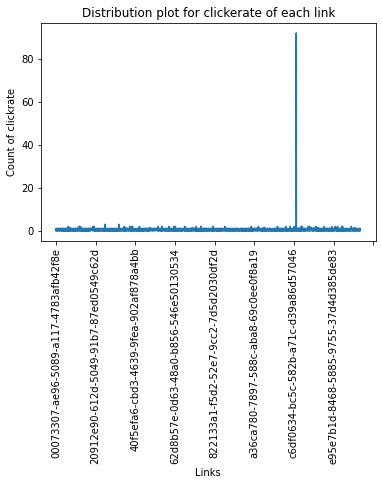

In [16]:
clickrate_per_link.plot(rot=90, legend=None)
plt.title("Distribution plot for clickerate of each link")
plt.xlabel("Links")
plt.ylabel("Count of clickrate")

## 6. Correlation 

### Calculating previews per link

In [17]:
previews_per_link = df[df['event']=='preview'].groupby('linkid').size()
previews_per_link = previews_per_link.to_frame()
print(previews_per_link)

                                        0
linkid                                   
006af6a0-1f0d-4b0c-93bf-756af9071c06   11
00759b81-3f04-4a61-b934-f8fb3185f4a0    1
00829040-ee01-4409-966d-d67c7965144a    9
00de7566-f014-4d20-8616-82e4dea45b88    1
0211bf4d-0e9d-46c2-889c-f97872280820  141
...                                   ...
fd647d87-4c7a-4dd1-92c6-0e7dd7fdf4f1  101
fe24ad63-e347-40db-8e75-94e573bd3d9b    1
fe8a3fcd-7beb-4db0-8494-5238e1e1cab3   57
fe8f7a23-be9d-49a6-b9b5-d26823c3f911   22
ffd8d5a7-91bc-48e1-a692-c26fca8a8ead   21

[495 rows x 1 columns]


### Looking at the correlation matrix

          0         0
0  1.000000  0.993422
0  0.993422  1.000000


<AxesSubplot:>

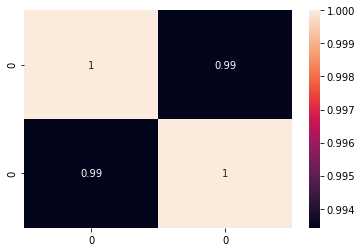

In [18]:
result = pd.concat([clicks_per_link, previews_per_link], axis=1).corr()
print(result)
sns.heatmap(result, annot=True)

##### As the correlation value between clicks and previews for each link is 0.9934, there is a highly positive correlation between these two